In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import os
from pathlib import Path
import umap
import warnings
from scipy.fftpack import rfft
warnings.filterwarnings('ignore')

In [2]:
siz = pd.read_csv("Data/seizure/data.csv", index_col=0).sample(10_000)
print(siz.shape)
siz.head()

(10000, 179)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X13.V1.774,247,45,-149,-265,-317,-353,-360,-319,-231,-153,...,217,103,-83,-245,-317,-318,-318,-307,-265,1
X6.V1.76,87,86,74,57,49,31,15,5,20,36,...,-83,-73,-61,-61,-74,-80,-85,-69,-61,5
X9.V1.651,-36,-27,-43,-46,-30,-39,-16,-4,-25,-42,...,83,106,99,71,58,51,31,9,5,4
X17.V1.410,6,-8,-20,-21,-33,-34,-31,-19,4,35,...,-18,-8,-10,-14,-25,-29,-23,-6,3,4
X15.V1.963,60,65,69,46,32,31,58,82,73,49,...,117,104,89,56,53,46,44,57,75,2


In [3]:
X,y = siz.values[:,:-1], siz['y'].values

target_dict={1:"seizure",
             2:"tumor",
             3:"healthy brain area",
             4:"eyes closed",
             5:"eyes open"}

target_color = {i:c for i,c in zip(np.arange(1,6), sns.color_palette("tab10",5))}

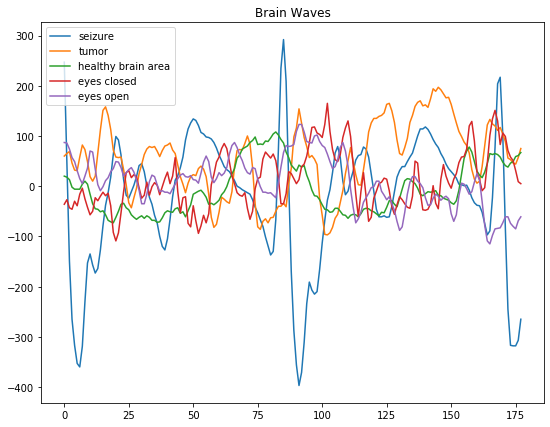

In [4]:
plt.figure(figsize=(9,7))
for i, group in siz.groupby('y'):
    plt.plot(np.arange(178),group.iloc[0,:-1], label = target_dict[i], c=target_color[i])
plt.title("Brain Waves")
plt.legend()

Text(0.5, 0.98, 'Brain Waves (normalized)')

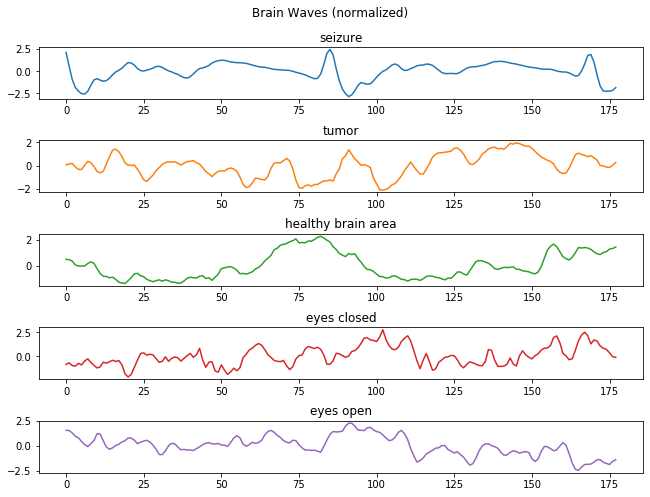

In [5]:
fig, ax = plt.subplots(5,1, figsize=(9,7))
for i, group in siz.groupby('y'):
    x=group.iloc[0,:-1]
    x = (x-x.mean()) / x.std()
    ax[i-1].plot(np.arange(178),x, c=target_color[i])
    ax[i-1].set_title(target_dict[i])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle("Brain Waves (normalized)")

In [18]:
funcs = {
    "PCA":PCA(),
    "UMAP":umap.UMAP(n_neighbors=20)
}

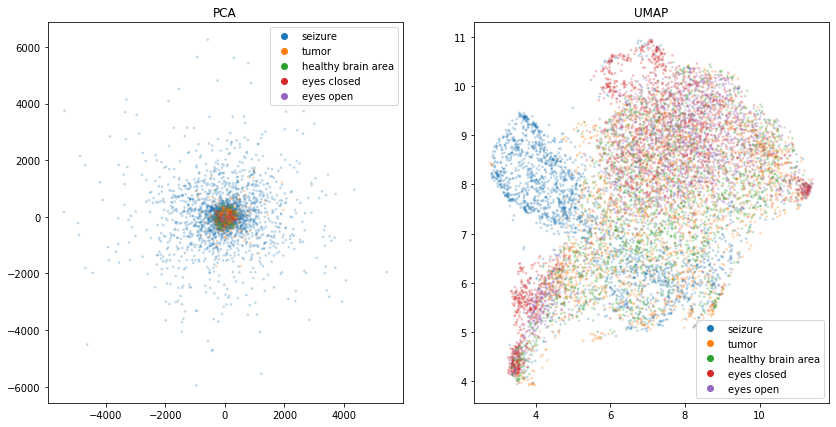

In [19]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
for i,(name, f) in enumerate(funcs.items()):
    proj = f.fit_transform(X)
    sc = ax[i].scatter(proj[:,0], proj[:,1], 
                 alpha=0.2, c=[target_color[y_] for y_ in y], s=3)
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in target_color.values()]
    ax[i].legend(markers, target_dict.values(), numpoints=1)
    ax[i].set_title(name)
plt.show()

In [20]:
X_scaled = (X-X.mean(axis=1)[:,None])/X.std(axis=1)[:,None]

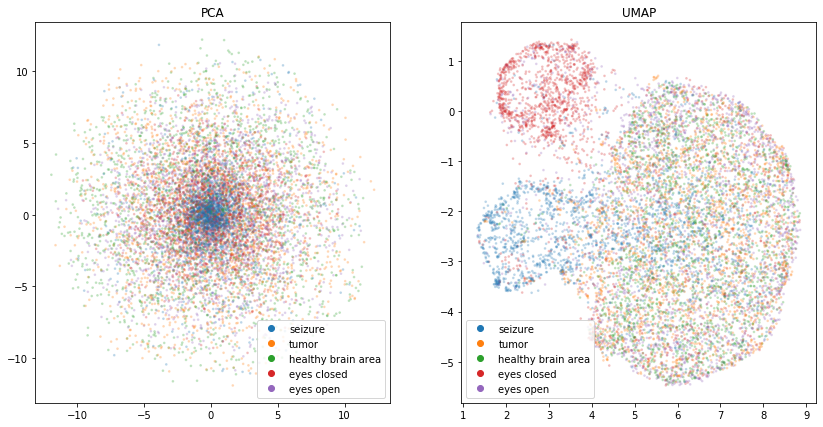

In [21]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
for i,(name, f) in enumerate(funcs.items()):
    proj = f.fit_transform(X_scaled)
    sc = ax[i].scatter(proj[:,0], proj[:,1], 
                 alpha=0.2, c=[target_color[y_] for y_ in y], s=3,
                 cmap="tab10")
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in target_color.values()]
    ax[i].legend(markers, target_dict.values(), numpoints=1)
    ax[i].set_title(name)
plt.show()

In [22]:
X_fft = rfft(X_scaled, 32)

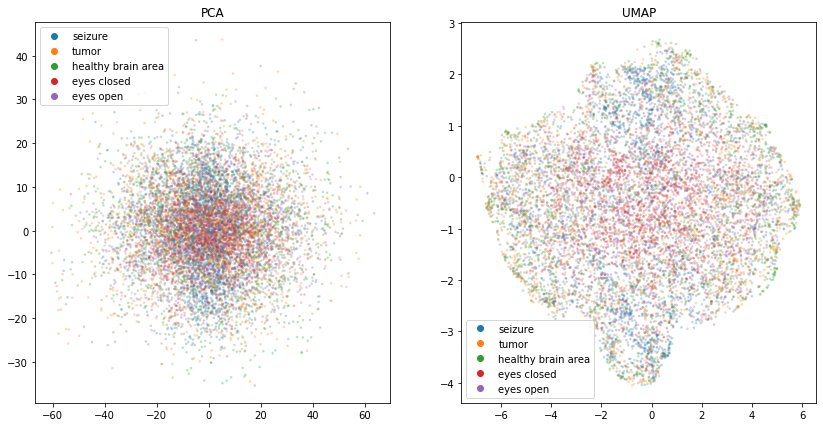

In [23]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
for i,(name, f) in enumerate(funcs.items()):
    proj = f.fit_transform(X_fft)
    sc = ax[i].scatter(proj[:,0], proj[:,1], 
                 alpha=0.2, c=[target_color[y_] for y_ in y], s=3,
                 cmap="tab10")
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in target_color.values()]
    ax[i].legend(markers, target_dict.values(), numpoints=1)
    ax[i].set_title(name)
plt.show()